<a href="https://colab.research.google.com/github/Annette-1/Ecuaciones_Diferenciales_Parciales/blob/main/Serie%20de%20fourier%20ej_clase.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Análisis de una solución de la ecuación del calor

La función \( f(x) \) está definida a tramos como:

f(x) =
\begin{cases}
0 & \text{si } \quad -2 \leq x < 0, \\
2 - x & \text{si } \quad 0 \leq x \leq 2.
\end{cases}


Esta dada en términos de la serie de Fourier por la expresión:
$$f(x) = \frac{1}{2} + \sum_{n=1}^{\infty} \left( \frac{2}{(n\pi)^2} (1 - (-1)^n) \cos \left( \frac{n\pi x}{2} \right) +  \frac{2}{n\pi} sen ( \frac{n\pi x}{2}) \right)$$

Este problema modela la transferencia de calor en una barra ideal delgada, con $k=1$.


Importamos las librerias necesarias



In [ ]:
from pylab import *
from mpl_toolkits.mplot3d import Axes3D


Definimos la serie de Fourier truncada con N términos

In [ ]:
def fourier_series(x, N=20):
    f = 0.5  # Término a_0/2
    for n in range(1, N+1):
        an = (2 * (-1)**(n-1)) / (n**2 * pi**2)
        bn = (2 / (n * pi))
        f += an * cos(n * pi * x / 2) + bn * sin(n * pi * x / 2)
    return f

Definimos la función con dependencia temporal

In [ ]:
def fourier_series_time(x, t, N=50):
    f = zeros((len(x), len(t)))
    for i in range(len(t)):
        f[:, i] = fourier_series(x, N) * exp(-t[i])  # Agregamos decaimiento exponencial
    return f

Definimos el dominio de x y el tiempo

In [ ]:

x = linspace(-2, 2, 100)
t = linspace(0, 10, 100)


 Aproximación de la serie para diferentes tiempos

In [ ]:

U = fourier_series_time(x, t, N=50)


Graficamos la evolución de la función en diferentes tiempos

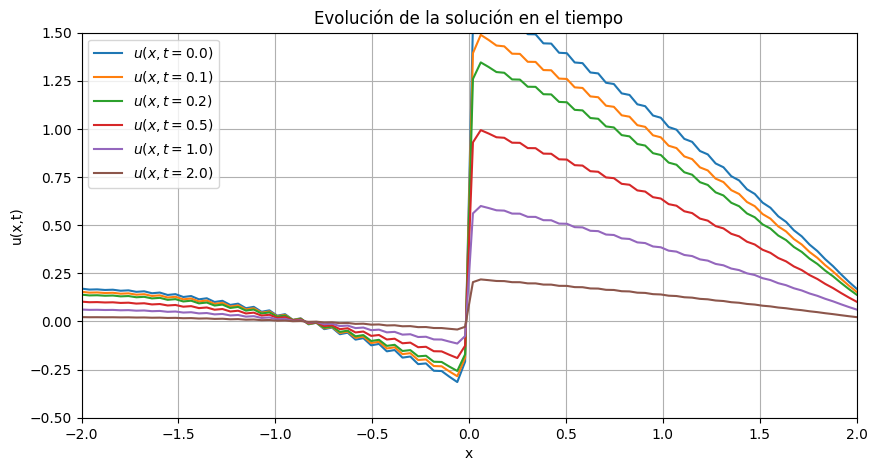

In [ ]:
figure(figsize=(10,5))
for i in [0, 1, 2, 5, 10, 20]:
    plot(x, U[:, i], label=f'$u(x,t={t[i]:.1f})$')

xlabel('x')
ylabel('u(x,t)')
title('Evolución de la solución en el tiempo')
legend()
grid()
xlim(-2, 2)
ylim(-0.5, 1.5)
show()

